# Census Data Exploration: Age distribution in the City of Los Angeles
This notebook explores Census Data in Los Angeles, using the Age by Sex variable, downloaded in .geojson format from Census Reporter. This data is from the 2015-2019 5-year American Community Survey. This data will be useful for our project because it will allow us to investigate if age has on impact on where collisions, injuries, and fatalities take place. For example, do neighborhoods with a greater proportion of children or elderly people have more collision hot spots? Is this something we could preemptively design for when designing our roads and streets? Hopefully we'll find out!

*Notebook Author: Ellie Gertler*

## Importing Data 

**Step 1:** First I will Import the spatial data libraries that I will eventually use to create charts, graphs, and maps in this notebook.

In [307]:
import pandas as pd 
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

**Step 2:** Next I will import the 5-year ACS data in .geojson format that I will use for this notebook.

In [308]:
gdf = gpd.read_file('Data/acs2019_5yr_B01001_14000US06037293306.geojson')

## Initial Data Exploration

**Step 1:** In the next few cells, I will do a preliminary general exploration of my data set to see what I am working with. This will allow me to see if there is any clean up that needs to be done, if I need to drop any rows, etc. 

In [309]:
gdf.shape # This gives me a quick look at the size of the data and how many rows/columns my table has. 

(1005, 101)

In [310]:
gdf.head() # Here I'm getting a quick look at the first 5 rows in my table.

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,2040.0,285.0,121.0,83.0,98.0,53.0,...,59.0,63.0,39.0,69.0,60.0,85.0,52.0,75.0,45.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,1626.0,218.0,34.0,26.0,49.0,53.0,...,61.0,73.0,49.0,64.0,49.0,39.0,33.0,44.0,43.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3350.0,343.0,308.0,262.0,210.0,118.0,...,65.0,79.0,57.0,24.0,56.0,20.0,29.0,20.0,28.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,1717.0,197.0,51.0,40.0,115.0,60.0,...,28.0,66.0,43.0,94.0,55.0,52.0,44.0,24.0,27.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,1897.0,253.0,58.0,56.0,176.0,108.0,...,39.0,123.0,70.0,137.0,82.0,39.0,30.0,146.0,64.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [311]:
gdf.tail() # Here I notice that the last row of data is not a census tract but instead data for the entire City of LA, so I will need to get rid of that row in the next step.

,geoid,name,B01001001,"B01001001, Error",B01001002,"B01001002, Error",B01001003,"B01001003, Error",B01001004,"B01001004, Error",...,"B01001045, Error",B01001046,"B01001046, Error",B01001047,"B01001047, Error",B01001048,"B01001048, Error",B01001049,"B01001049, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,18.0,24.0,19.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,1151.0,171.0,20.0,32.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",3966936.0,82.0,1964984.0,3968.0,119444.0,2177.0,114382.0,1884.0,...,1212.0,66609.0,1369.0,47550.0,1449.0,37293.0,1031.0,45457.0,1238.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [312]:
gdf.info(verbose=True, show_counts=True) # For some reason, when I just typed gdf.info() only the summary info at the top displayed, and not the columns. So I looked up how to print the rest of the info and used the verbose and show_counts arguments.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 101 columns):
 #    Column            Non-Null Count  Dtype   
---   ------            --------------  -----   
 0    geoid             1005 non-null   object  
 1    name              1005 non-null   object  
 2    B01001001         1005 non-null   float64 
 3    B01001001, Error  1005 non-null   float64 
 4    B01001002         1005 non-null   float64 
 5    B01001002, Error  1005 non-null   float64 
 6    B01001003         1005 non-null   float64 
 7    B01001003, Error  1005 non-null   float64 
 8    B01001004         1005 non-null   float64 
 9    B01001004, Error  1005 non-null   float64 
 10   B01001005         1005 non-null   float64 
 11   B01001005, Error  1005 non-null   float64 
 12   B01001006         1005 non-null   float64 
 13   B01001006, Error  1005 non-null   float64 
 14   B01001007         1005 non-null   float64 
 15   B01001007, Error  1005 non-null   float64 
 1

<AxesSubplot:>

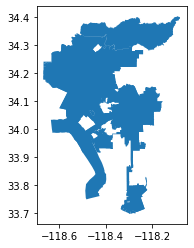

In [313]:
gdf.plot() # Here I plotted the data and notice that around the area of (-118.5, 34) on the graph, something looks a little off
# After some investigations of the data on Census Reporter, I see that census tract 9902 is 0% populated and is off the coast near the Pacific Palisades and Venice/Marinda Del Rey
# Becaue this tract is 0% populated, I'm going to drop this from this data set so that it does not continue to show up on the maps that I will make later on in this notebook

## Data Clean-up

In the previous section I did some preliminary data exploration to understand the data that I am working with. In this section I will do some data clean up, including dropping rows and columns, renaming columns, normalizing data, etc.

**Step 1:** I'm going to drop two rows. The first row I am going to drop is row 1004 because this row contains all LA City data and is not a census tract. I am also going to drop row 1003 because this is census tract 9902, which I mentioned above. (This is a census tract off the coast that is 0% populated).

In [314]:
gdf = gdf.drop([1004])
gdf = gdf.drop([1003])

<AxesSubplot:>

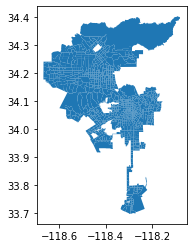

In [315]:
gdf.plot() # I'm plotting the data here to now take a look at how our data looks after dropping those two rows. As we can see, the data now includes just the census tracts within the LA city boundary.

**Step 2:**: I will now drop the columns that I do not wish to keep. First I will make a list of all of the columns to see which ones I do not want to keep, and then I will make another list of just hte columns I do wish to keep and run the code to keep just those columns. 

In [316]:
list(gdf) # Here I am just taking a look at all of the columns I have so that I can see which ones I want to keep and which ones I want to get rid of. 

['geoid',
 'name',
 'B01001001',
 'B01001001, Error',
 'B01001002',
 'B01001002, Error',
 'B01001003',
 'B01001003, Error',
 'B01001004',
 'B01001004, Error',
 'B01001005',
 'B01001005, Error',
 'B01001006',
 'B01001006, Error',
 'B01001007',
 'B01001007, Error',
 'B01001008',
 'B01001008, Error',
 'B01001009',
 'B01001009, Error',
 'B01001010',
 'B01001010, Error',
 'B01001011',
 'B01001011, Error',
 'B01001012',
 'B01001012, Error',
 'B01001013',
 'B01001013, Error',
 'B01001014',
 'B01001014, Error',
 'B01001015',
 'B01001015, Error',
 'B01001016',
 'B01001016, Error',
 'B01001017',
 'B01001017, Error',
 'B01001018',
 'B01001018, Error',
 'B01001019',
 'B01001019, Error',
 'B01001020',
 'B01001020, Error',
 'B01001021',
 'B01001021, Error',
 'B01001022',
 'B01001022, Error',
 'B01001023',
 'B01001023, Error',
 'B01001024',
 'B01001024, Error',
 'B01001025',
 'B01001025, Error',
 'B01001026',
 'B01001026, Error',
 'B01001027',
 'B01001027, Error',
 'B01001028',
 'B01001028, Error',
 

In [317]:
columns_to_keep = ['geoid',        # These are the columns I am deciding to keep
    'name',
    'B01001001',
    'B01001002',
    'B01001003',
    'B01001004',
    'B01001005',
    'B01001006',
    'B01001007',
    'B01001008',
    'B01001009',
    'B01001010',
    'B01001011',
    'B01001012',
    'B01001013',
    'B01001014',
    'B01001015',
    'B01001016',
    'B01001017',
    'B01001018',
    'B01001019',
    'B01001020',
    'B01001021',
    'B01001022',
    'B01001023',
    'B01001024',
    'B01001025',
    'B01001026',
    'B01001027',
    'B01001028',
    'B01001029',
    'B01001030',
    'B01001031',
    'B01001032',
    'B01001033',
    'B01001034',
    'B01001035',
    'B01001036',
    'B01001037',
    'B01001038',
    'B01001039',
    'B01001040',
    'B01001041',
    'B01001042',
    'B01001043',
    'B01001044',
    'B01001045',
    'B01001046',
    'B01001047',
    'B01001048',
    'B01001049',
    'geometry']

In [318]:
gdf = gdf[columns_to_keep] # now I am redefining the gdf with the columns I decided to keep above 

In [319]:
gdf.sample()  # Here I am just checking to see if the correct columns were kept/dropped and it appears that all is correct!

,geoid,name,B01001001,B01001002,B01001003,B01001004,B01001005,B01001006,B01001007,B01001008,...,B01001041,B01001042,B01001043,B01001044,B01001045,B01001046,B01001047,B01001048,B01001049,geometry
814,14000US06037241300,"Census Tract 2413, Los Angeles, CA",2480.0,1219.0,98.0,160.0,100.0,40.0,47.0,24.0,...,115.0,0.0,9.0,27.0,33.0,31.0,50.0,35.0,18.0,"MULTIPOLYGON (((-118.29154 33.92732, -118.2915..."


**Step 3**: Now I am going to rename my columns.

In [320]:
gdf.columns = ['geoid',        
    'name',
    'Total',
    'Male',
    'M - Under 5 years',
    'M - 5 to 9 years',
    'M - 10 to 14 years',
    'M - 15 to 17 years',
    'M - 18 and 19 years',
    'M - 20 years',
    'M - 21 years',
    'M - 22 to 24 years',
    'M - 25 to 29 years',
    'M - 30 to 34 years',
    'M - 35 to 39 years',
    'M - 40 to 44 years',
    'M - 45 to 49 years',
    'M - 50 to 54 years',
    'M - 55 to 59 years',
    'M - 60 and 61 years',
    'M - 62 to 64 years',
    'M - 65 and 66 years',
    'M - 67 to 69 years',
    'M - 70 to 74 years',
    'M - 75 to 79 years',
    'M - 80 to 84 years',
    'M - 85 years and over',
    'Female',
    'F - Under 5 years',
    'F - 5 to 9 years',
    'F - 10 to 14 years',
    'F - 15 to 17 years',
    'F - 18 and 19 years',
    'F - 20 years',
    'F - 21 years',
    'F - 22 to 24 years',
    'F - 25 to 29 years',
    'F - 30 to 34 years',
    'F - 35 to 39 years',
    'F - 40 to 44 years',
    'F - 45 to 49 years',
    'F - 50 to 54 years',
    'F - 55 to 59 years',
    'F - 60 and 61 years',
    'F - 62 to 64 years',
    'F - 65 and 66 years',
    'F - 67 to 69 years',
    'F - 70 to 74 years',
    'F - 75 to 79 years',
    'F - 80 to 84 years',
    'F - 85 years and over',
    'geometry']

In [321]:
gdf.sample() # after I renamed the columns I just want to make sure that the columns have been renamed correctly.

,geoid,name,Total,Male,M - Under 5 years,M - 5 to 9 years,M - 10 to 14 years,M - 15 to 17 years,M - 18 and 19 years,M - 20 years,...,F - 55 to 59 years,F - 60 and 61 years,F - 62 to 64 years,F - 65 and 66 years,F - 67 to 69 years,F - 70 to 74 years,F - 75 to 79 years,F - 80 to 84 years,F - 85 years and over,geometry
189,14000US06037123902,"Census Tract 1239.02, Los Angeles, CA",2668.0,1304.0,51.0,82.0,66.0,42.0,17.0,0.0,...,87.0,22.0,43.0,31.0,30.0,24.0,42.0,33.0,22.0,"MULTIPOLYGON (((-118.39651 34.17889, -118.3965..."


**Step 4:** After renaming the columns, I realize that it might make more sense to combine some of the columns to get a better sense of how age is distributed throughout LA. So, in this step, I will combine columns into age groupings that make more sense than how they are broken up now. I will also combine Male+Female because I am not particularly interested in how the age distribution is different by sex for this project. For example, I do not need 20 year olds and 21 year olds in their own categories. Combining the ages into larger groupings will enable me to visualize the data in a way that makes more sense later on than if I were to keep the columns as they are now.

The age groupings that I want instead are: **Under 18, 18-24, 25-34, 35-44, 45-54, 55-64, 65 and above**

In [323]:
gdf['18 and under'] = gdf['M - Under 5 years'] + gdf['M - 5 to 9 years'] + gdf['M - 10 to 14 years']+ gdf['M - 15 to 17 years'] + gdf['F - Under 5 years'] + gdf['F - 5 to 9 years'] + gdf['F - 10 to 14 years'] + gdf['F - 15 to 17 years']
gdf['18-24'] = gdf['M - 18 and 19 years'] + gdf['M - 20 years'] + gdf['M - 21 years'] + gdf['M - 22 to 24 years'] + gdf['F - 18 and 19 years'] + gdf['F - 20 years'] + gdf['F - 21 years'] + gdf['F - 22 to 24 years']
gdf['25-34'] = gdf['M - 25 to 29 years'] + gdf['M - 30 to 34 years'] + gdf['F - 25 to 29 years'] + gdf['F - 30 to 34 years']
gdf['35-44'] = gdf['M - 35 to 39 years'] + gdf['M - 40 to 44 years'] + gdf['F - 35 to 39 years'] + gdf['F - 40 to 44 years']
gdf['45-54'] = gdf['M - 45 to 49 years'] + gdf['M - 50 to 54 years'] + gdf['F - 45 to 49 years'] + gdf['F - 50 to 54 years'] 
gdf['55-64'] = gdf['M - 55 to 59 years'] + gdf['M - 60 and 61 years'] + gdf['M - 62 to 64 years'] + gdf['F - 55 to 59 years'] + gdf['F - 60 and 61 years'] + gdf['F - 62 to 64 years']
gdf['65 and above'] = gdf['M - 65 and 66 years'] + gdf['M - 67 to 69 years'] + gdf['M - 70 to 74 years'] + gdf['M - 75 to 79 years'] + gdf['M - 80 to 84 years'] + gdf['M - 85 years and over'] + gdf['F - 65 and 66 years'] + gdf['F - 67 to 69 years'] + gdf['F - 70 to 74 years'] + gdf['F - 75 to 79 years'] + gdf['F - 80 to 84 years'] + gdf['F - 85 years and over']

In [324]:
gdf.sample() # here I see that my new columns have been added

,geoid,name,Total,Male,M - Under 5 years,M - 5 to 9 years,M - 10 to 14 years,M - 15 to 17 years,M - 18 and 19 years,M - 20 years,...,F - 80 to 84 years,F - 85 years and over,geometry,18 and under,18-24,25-34,35-44,45-54,55-64,65 and above
518,14000US06037204200,"Census Tract 2042, Los Angeles, CA",3657.0,1916.0,179.0,136.0,236.0,51.0,122.0,24.0,...,38.0,15.0,"MULTIPOLYGON (((-118.20948 34.04415, -118.2089...",1150.0,546.0,473.0,533.0,433.0,275.0,247.0


**Step 5:** Now I will get ride of the columns of ages that I no longer want since I just generated new columns. 

In [325]:
new_columns_to_keep = ['geoid',        # These are the columns I am deciding to keep
    'name',
    'Total',
    '18 and under',                   
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    '55-64',
    '65 and above',
    'geometry']

In [327]:
gdf = gdf[new_columns_to_keep] # now I am redefining the gdf with the columns I decided to keep above

In [328]:
gdf.sample() # Here I can see that I have kept just the data that I wanted and have a much more manageable data frame. 

,geoid,name,Total,18 and under,18-24,25-34,35-44,45-54,55-64,65 and above,geometry
196,14000US06037124203,"Census Tract 1242.03, Los Angeles, CA",2384.0,324.0,368.0,521.0,304.0,292.0,304.0,271.0,"MULTIPOLYGON (((-118.37903 34.17942, -118.3768..."


in the next section (Data Integrity), I will ensure that my math all adds up 

**Step 4**: I am now going to normalize the data so that it is easier to understand, especially for mapping excercises.

In [329]:
gdf['Percent 18 and under'] = gdf['18 and under']/gdf['Total']*100
gdf['Percent 18-24'] = gdf['18-24']/gdf['Total']*100
gdf['Percent 25-34'] = gdf['25-34']/gdf['Total']*100
gdf['Percent 35-44'] = gdf['35-44']/gdf['Total']*100
gdf['Percent 45-54'] = gdf['45-54']/gdf['Total']*100
gdf['Percent 55-64'] = gdf['55-64']/gdf['Total']*100
gdf['Percent 65 and above'] = gdf['65 and above']/gdf['Total']*100

In [330]:
gdf.sample() # here we can see that the new Percent columns have been generated

,geoid,name,Total,18 and under,18-24,25-34,35-44,45-54,55-64,65 and above,geometry,Percent 18 and under,Percent 18-24,Percent 25-34,Percent 35-44,Percent 45-54,Percent 55-64,Percent 65 and above
581,14000US06037211202,"Census Tract 2112.02, Los Angeles, CA",2239.0,389.0,212.0,463.0,276.0,361.0,307.0,231.0,"MULTIPOLYGON (((-118.29656 34.07631, -118.2958...",17.373828,9.468513,20.678874,12.326932,16.123269,13.711478,10.317106


## Data Integrity

Since I did a lot of clean up in the section above, including dropping columns and rows, renaming columns, combining columns and adding new ones, in this section I will ensure that my data still adds up to the correct totals. 

**Step 1**: I am going to check that my `Total` columns equal the rest of my columns.

In [331]:
random_tract_new = gdf.sample()   # here I am getting a random record to check that all of my data is still intact
random_tract_new

,geoid,name,Total,18 and under,18-24,25-34,35-44,45-54,55-64,65 and above,geometry,Percent 18 and under,Percent 18-24,Percent 25-34,Percent 35-44,Percent 45-54,Percent 55-64,Percent 65 and above
783,14000US06037238400,"Census Tract 2384, Los Angeles, CA",4694.0,1025.0,209.0,592.0,593.0,524.0,679.0,1072.0,"MULTIPOLYGON (((-118.31776 33.95950, -118.3177...",21.836387,4.452493,12.611845,12.633149,11.163187,14.465275,22.837665


In [24]:
# now I am going to make sure that the 7 age grouping columns add up to the total I got in the above output (4511)

In [332]:
print('All age columns total:' + str(random_tract_new.iloc[0]['18 and under'] + random_tract_new.iloc[0]['18-24'] + random_tract_new.iloc[0]['25-34'] + random_tract_new.iloc[0]['35-44'] + random_tract_new.iloc[0]['45-54'] + random_tract_new.iloc[0]['55-64'] + random_tract_new.iloc[0]['65 and above']))
                                                                                

All age columns total:4694.0


In [333]:
# The total population from the random_tract_new equals the total of all of the age groupings.  

## Data Visualization
Now that I've clean up my data and have ensured its integrity, I am going to create some maps and charts.

**Step 1:** Now I am going to generate some maps to explore how age is distributed throughout the city. 


I am first going to generate two side-by-side maps to explore which census tracts contain a higher proportion of people aged 65 and above, and which census tracts contain a higher proportion of people aged 18 and under. Eventually, we can use this data to see if there are more collissions/severe injuries in these census tracts. 

Text(0.5, 1.0, 'Percent 65 and above')

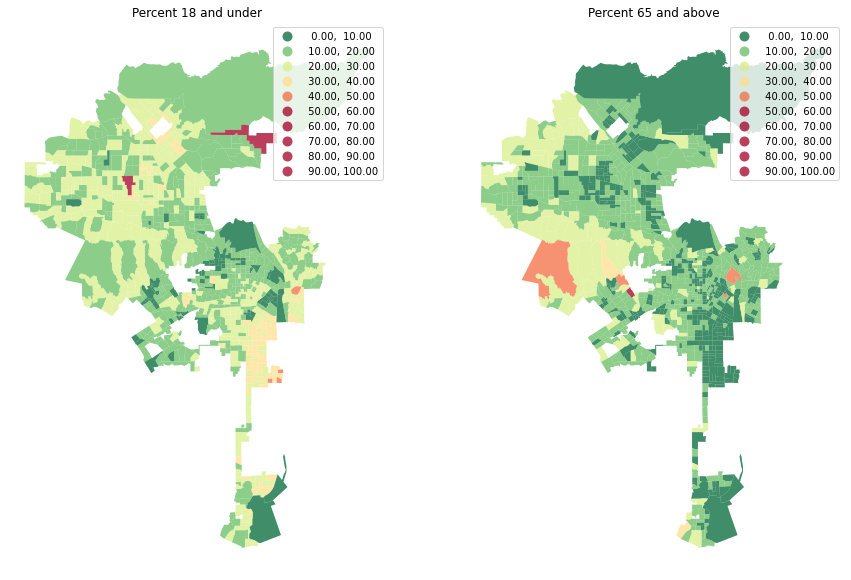

In [334]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent under 18 map on the left
gdf.plot(column='Percent 18 and under', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]}, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent 18 and under")

# percent 65 and above map on the right
gdf.plot(column='Percent 65 and above', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},  
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True)

ax2.axis("off")
ax2.set_title("Percent 65 and above")

**Step 2**: I am now going to look at census tracts that have a proportion of 18 and under that is greater than 50%, and will add a basemap so that we can visualize where this actually is in the city of LA.

<AxesSubplot:>

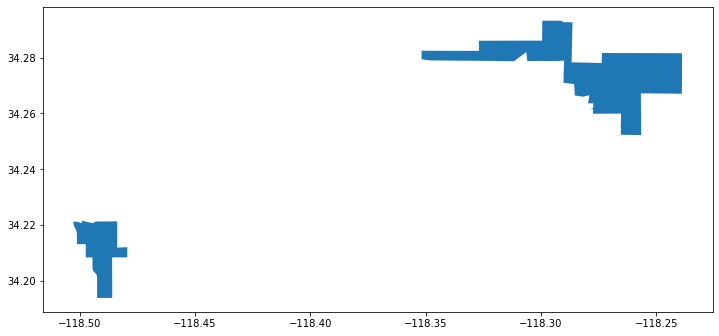

In [335]:
gdf[gdf['Percent 18 and under'] > 50]  
gdf[gdf['Percent 18 and under'] > 50].plot(figsize=(12,10))  #here I am generating the census tracts where the percent of those aged 18 and under is greater than 50.

In [336]:
# reproject to Web Mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

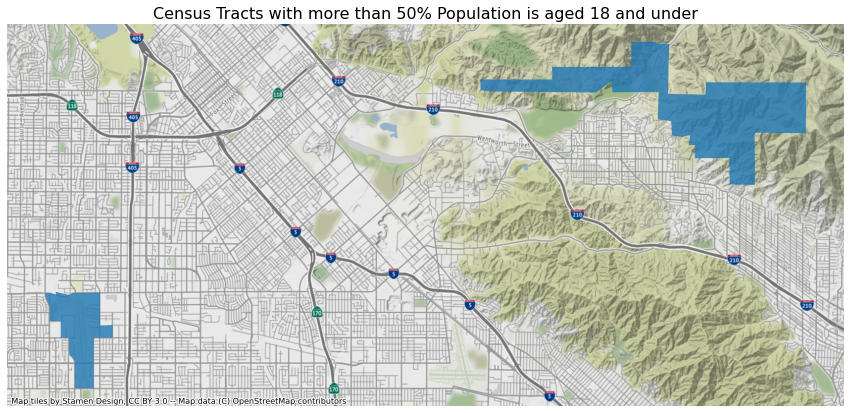

In [337]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent 18 and under'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% Population is aged 18 and under',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

**Step 4**: I am now going to look at census tracts that have a proportion of 65 and above that is greater than 40%, and will add a basemap so that we can visualize where this actually is in the city of LA.

<AxesSubplot:>

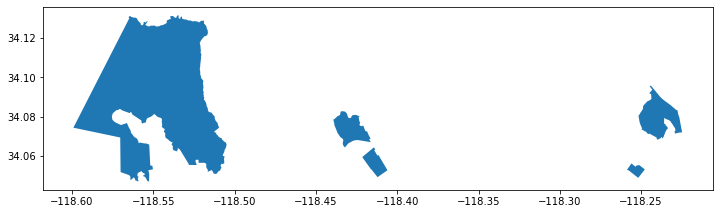

In [304]:
gdf[gdf['Percent 65 and above'] > 40]  
gdf[gdf['Percent 65 and above'] > 40].plot(figsize=(12,10))  

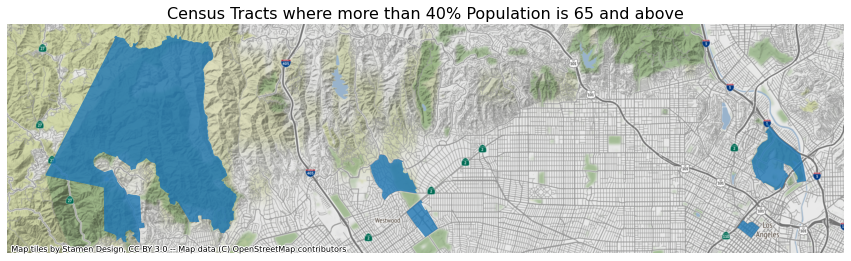

In [305]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent 65 and above'] > 40].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts where more than 40% Population is 65 and above',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

**Step 2**: Now that I've seen which census tracts have high proportions of both young and old, I want to see a bar chart of how age is distributed throughout LA.

First I am going to find the sums all of my columns for each age group. This will allow me to portray the totals of each age grouping on the chart, to see how age is distributed throughout the city. **NOTE:** something about this line of code *gdf[gdf[['Total','18 and under', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and above']].sum(axis=0)* is making it so that my side by side maps above do not show up, so I will just take not of the totals in the markdown cell below so that it does not interfere with my maps above.

Total: 3972867
18 and under: 822443
18-24: 407898
25-35: 718069
35-44: 569996
45-54: 522676
55-64: 439193
65 and above: 492592

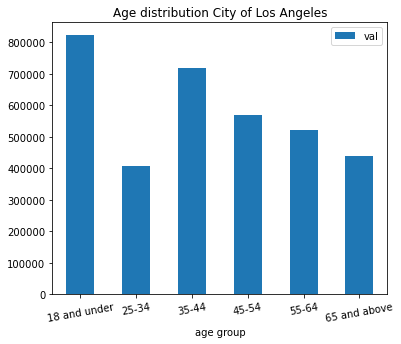

In [270]:
gdf = pd.DataFrame({'age group':['18 and under', '25-34', '35-44', '45-54', '55-64', '65 and above'], 'val':[(822443), (407898), (718069), (569996), (522676), (439193)]})
ax = gdf.plot.bar(
    figsize=(6,5),
    x='age group', y='val', title='Age distribution City of Los Angeles', rot=10)

I am now going to make a similar bar chart, but with percentages 

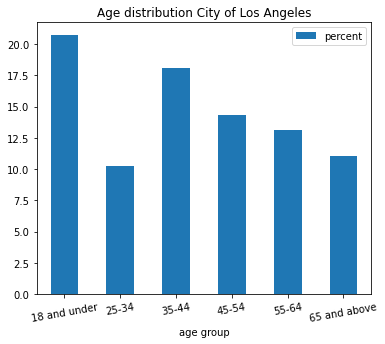

In [271]:
gdf = pd.DataFrame({'age group':['18 and under', '25-34', '35-44', '45-54', '55-64', '65 and above'], 'percent':[((822443.0/3972867)*100), ((407898.0/3972867)*100), ((718069.0/3972867)*100), ((569996.0/3972867)*100), ((522676.0/3972867)*100), ((439193.0/3972867)*100)]})
ax = gdf.plot.bar(
    figsize=(6,5),
    x='age group', y='percent', title='Age distribution City of Los Angeles', rot=10)